# <center>Image Classification

## 1. Install Dependencies and Setup

In [1]:
#!pip install tensorflow opencv-python matplotlib

In [2]:
#!pip list

In [3]:
import tensorflow as tf
import os

In [4]:
# # Avoid OOM errors by setting GPU Memory Consumption Growth
# gpus = tf.config.experimental.list_physical_devices('CPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

## 2. Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data'

In [7]:
# os.listdir(os.path.join(data_dir, 'happy'))

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except exception as e:
            print('Issue with image {}'.fotmat(image_path))
        

## 3. Load data

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 256 files belonging to 2 classes.


In [12]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
# Get defrent batches
batch = data_iterator.next()

In [15]:
# Images represented as numpy array
batch[0].shape

(32, 256, 256, 3)

In [16]:
# Clase 1 = Sad People
# Clase 0 = Happy People
batch[1]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

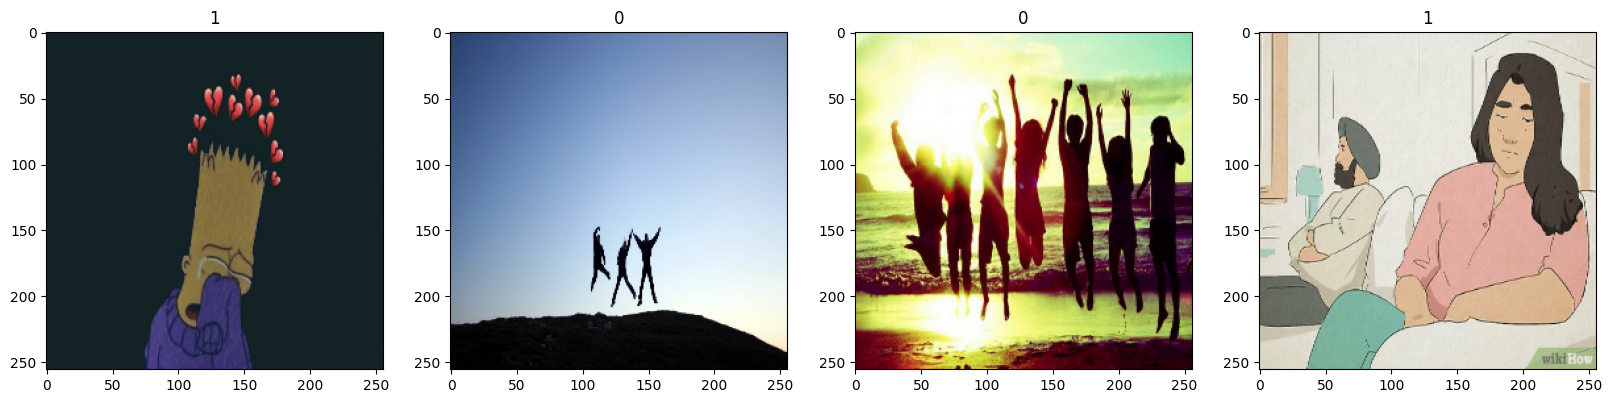

In [17]:
# ploting funtion
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

##  Preprocess Data

### 4. Scale data

In [18]:
print('batch[0] =', batch[0].shape)
print('batch[0] minimum =', batch[0].min())
print('batch[0] maximum =', batch[0].max())
print('batch[1] =', batch[1])

batch[0] = (32, 256, 256, 3)
batch[0] minimum = 0.0
batch[0] maximum = 255.0
batch[1] = [1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0]


In [19]:
scaled = data.map(lambda x,y: (x/255, y))

In [20]:
scaled_iterator = scaled.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

In [22]:
batch[0].max()

1.0

In [23]:
batch[0].min()

0.0

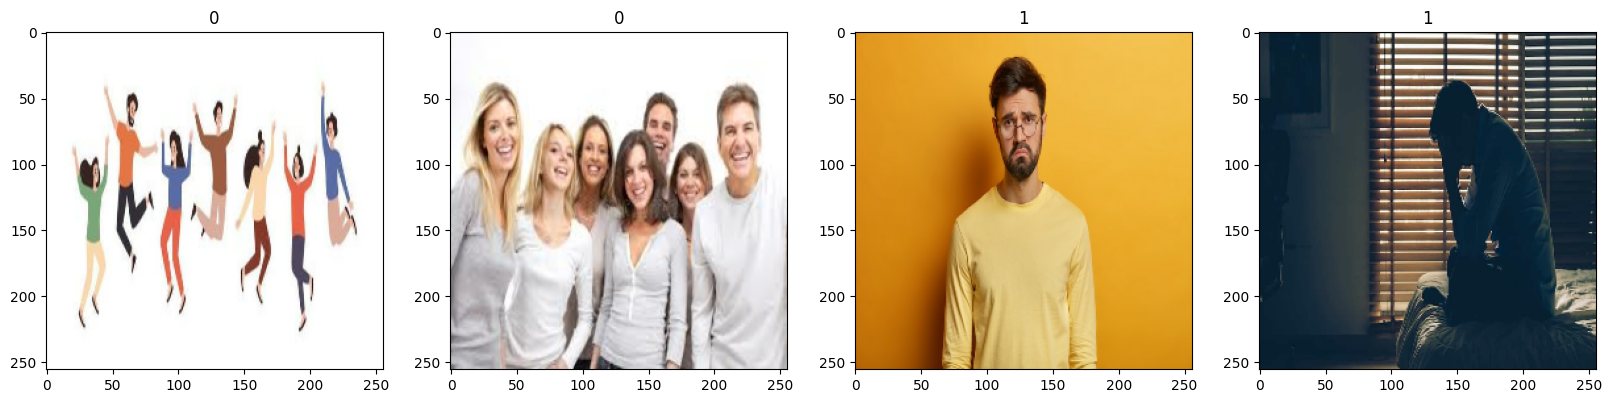

In [24]:
# ploting funtion
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 5 Split data

In [25]:
len(scaled)

8

In [26]:
train_size = int(len(scaled)*.7)
val_size = int(len(scaled)*.2) + 1
test_size = int(len(scaled)*.1) + 1

In [27]:
train = scaled.take(train_size)
val = scaled.skip(train_size).take(val_size)
test = scaled.skip(train_size+val_size).take(test_size)

## Deep Learning Model

### 6. Build Deep Learning Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### 7. Traing the model

In [32]:
logdir = 'logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 11s 2s/step - loss: 0.7248 - accuracy: 0.5125 - val_loss: 0.6448 - val_accuracy: 0.6875
Epoch 2/20
5/5 [==============================] - 10s 2s/step - loss: 0.6367 - accuracy: 0.6750 - val_loss: 0.6347 - val_accuracy: 0.7344
Epoch 3/20
5/5 [==============================] - 10s 2s/step - loss: 0.5577 - accuracy: 0.7625 - val_loss: 0.4228 - val_accuracy: 0.8125
Epoch 4/20
5/5 [==============================] - 10s 2s/step - loss: 0.5336 - accuracy: 0.7688 - val_loss: 0.4305 - val_accuracy: 0.8438
Epoch 5/20
5/5 [==============================] - 9s 2s/step - loss: 0.4500 - accuracy: 0.8250 - val_loss: 0.3365 - val_accuracy: 0.9375
Epoch 6/20
5/5 [==============================] - 9s 2s/step - loss: 0.3493 - accuracy: 0.9062 - val_loss: 0.3722 - val_accuracy: 0.8281
Epoch 7/20
5/5 [==============================] - 10s 2s/step - loss: 0.2846 - accuracy: 0.9062 - val_loss: 0.2284 - val_accuracy: 0.8906
Epoch 8/20
5/5 [====================

### 8. Plot Performance

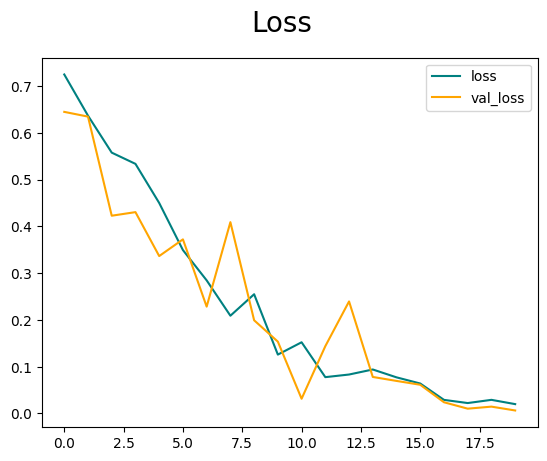

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label="loss")
plt.plot(hist.history["val_loss"], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

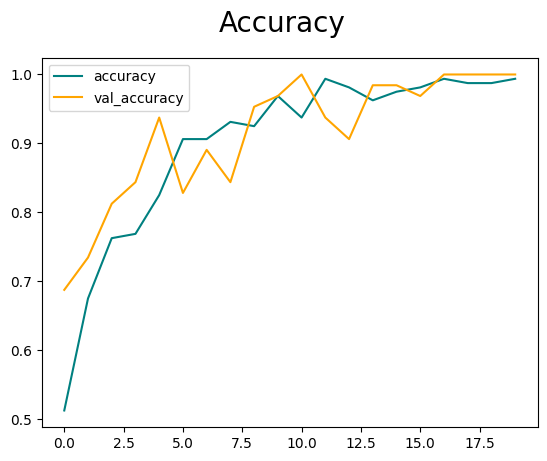

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

## 9. Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
model_precision = Precision()
model_recall = Recall()
model_BinaryAccuracy = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    model_precision.update_state(y, yhat)
    model_recall.update_state(y, yhat)
    model_BinaryAccuracy.update_state(y, yhat)

1/1 [==============================] - 0s 487ms/step


## 10. Test

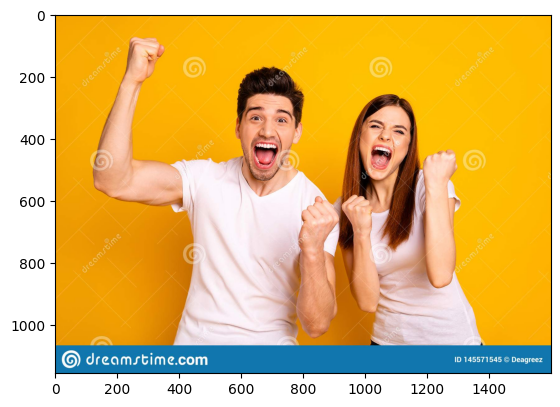

In [40]:
img = cv2.imread('happytest1.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

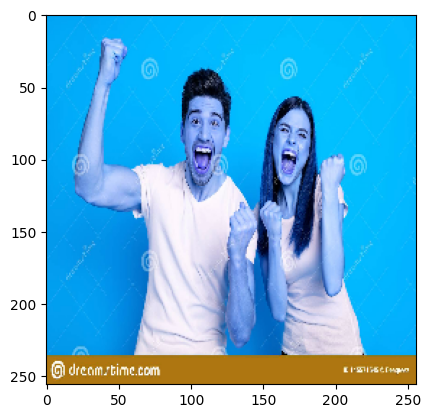

In [41]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
# plt.imshow(cv2.cvtColor(resize.numpy().astype(int), cv2.COLOR_BGR2RGB))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 176ms/step


In [43]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


## 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
# saving the model
model.save(os.path.join('models', 'happysadmodel.h5'))

In [46]:
# loading the model
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [47]:
new_model